<a href="https://colab.research.google.com/github/Exion007/Colab/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [249]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, recall_score, precision_score, mean_absolute_error

In [250]:
df = pd.read_csv("pokemon.csv")
df.head(4)

,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number                   1032 non-null   int64  
 1   Name                     1032 non-null   object 
 2   Type 1                   1032 non-null   object 
 3   Type 2                   548 non-null    object 
 4   Abilities                1032 non-null   object 
 5   HP                       1032 non-null   int64  
 6   Att                      1032 non-null   int64  
 7   Def                      1032 non-null   int64  
 8   Spa                      1032 non-null   int64  
 9   Spd                      1032 non-null   int64  
 10  Spe                      1032 non-null   int64  
 11  BST                      1032 non-null   int64  
 12  Mean                     1032 non-null   float64
 13  Standard Deviation       1032 non-null   float64
 14  Generation              

In [252]:
df["Type 2"].fillna("None", inplace = True)
print(df["Experience type"].unique())
print(df["Type 1"].unique())
print(df["Type 2"].unique())

['Medium Slow' 'Medium Fast' 'Fast' 'Slow' 'Fluctuating' 'Erratic']
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Dark' 'Poison' 'Electric' 'Ground'
 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Dragon'
 'Flying']
['Poison' 'None' 'Flying' 'Dragon' 'Normal' 'Psychic' 'Steel' 'Ground'
 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost' 'Rock' 'Water'
 'Fire' 'Bug']


In [253]:
legendary_col = df['Legendary']  # Column that holds actual legendary values (in float)
df = df.iloc[:,1:20]
df = df.drop(columns=["Name", "Mean", "Standard Deviation", "Abilities"])
df.head()

,Type 1,Type 2,HP,Att,Def,Spa,Spd,Spe,BST,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary
0,Grass,Poison,45,49,49,65,65,45,318,1.0,Medium Slow,1059860,0.0,45,0.0
1,Grass,Poison,60,62,63,80,80,60,405,1.0,Medium Slow,1059860,0.0,45,0.0
2,Grass,Poison,80,82,83,100,100,80,525,1.0,Medium Slow,1059860,1.0,45,0.0
3,Grass,Poison,80,100,123,122,120,80,625,6.0,Medium Slow,1059860,1.0,45,0.0
4,Fire,None,39,52,43,60,50,65,309,1.0,Medium Slow,1059860,0.0,45,0.0


<ipython-input-254-b59c5d68ca62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


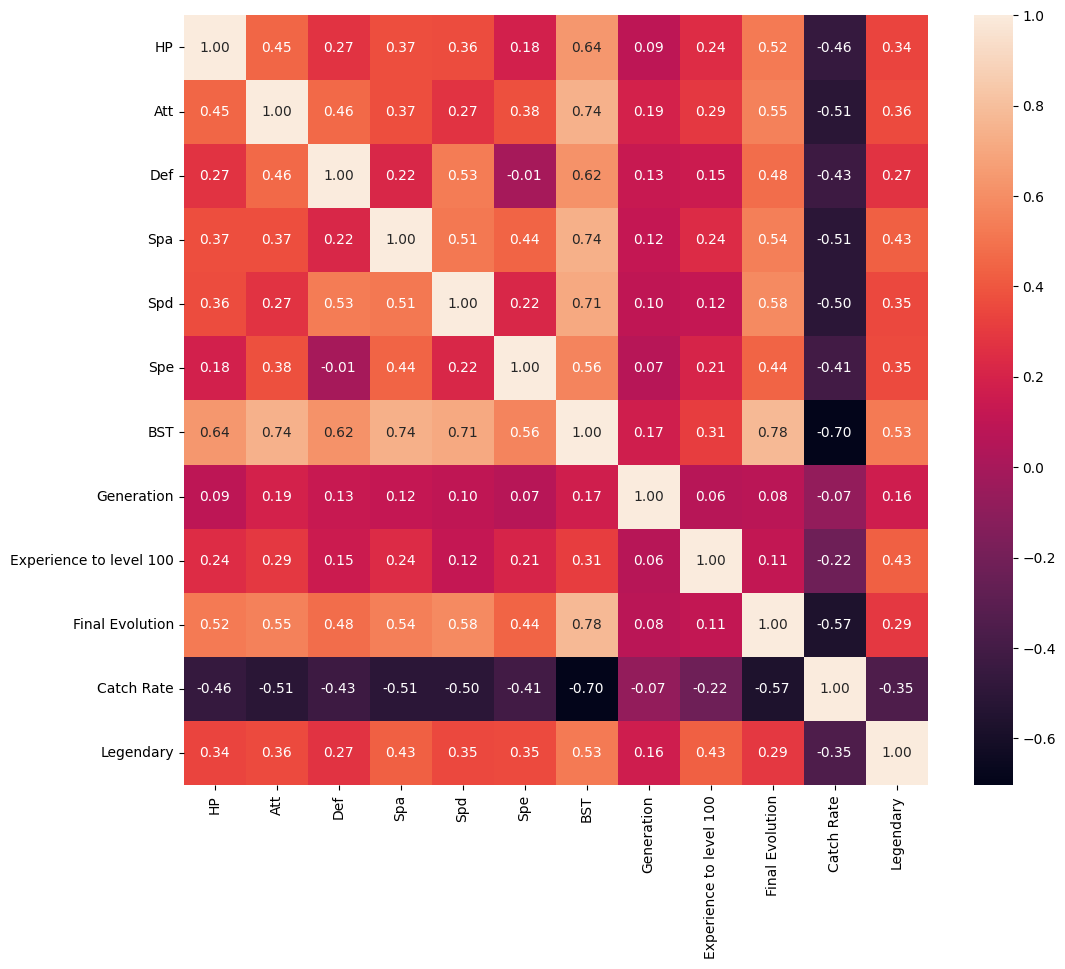

In [254]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [255]:
le = LabelEncoder()
df['Legendary'] = le.fit_transform(df['Legendary'])
df["Type 1"] = le.fit_transform(df["Type 1"])
df["Type 2"] = le.fit_transform(df["Type 2"])
df["Experience type"] = le.fit_transform(df["Experience type"])

In [256]:
X = df.drop(columns = "Legendary")
y = df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Random Forest", "\n")
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Random Forest 

Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       181
           1       1.00      0.85      0.92        26

    accuracy                           0.98       207
   macro avg       0.99      0.92      0.95       207
weighted avg       0.98      0.98      0.98       207



In [258]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistic Regression", "\n")
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Logistic Regression 

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       181
           1       1.00      0.69      0.82        26

    accuracy                           0.96       207
   macro avg       0.98      0.85      0.90       207
weighted avg       0.96      0.96      0.96       207



In [259]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Support Vector Machine (SVC)", "\n")
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Support Vector Machine (SVC) 

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       181
           1       0.78      0.27      0.40        26

    accuracy                           0.90       207
   macro avg       0.84      0.63      0.67       207
weighted avg       0.89      0.90      0.88       207



In [260]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Decision Tree", "\n")
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Decision Tree 

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       181
           1       0.93      0.96      0.94        26

    accuracy                           0.99       207
   macro avg       0.96      0.98      0.97       207
weighted avg       0.99      0.99      0.99       207



In [262]:
clf = XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("XGBoost", "\n")
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

XGBoost 

Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       181
           1       1.00      0.92      0.96        26

    accuracy                           0.99       207
   macro avg       0.99      0.96      0.98       207
weighted avg       0.99      0.99      0.99       207

